**PyTorch Workflow**

In [2]:
what_were_covering = {1: 'data (prepare and load)',
                      2: 'build model',
                      3: 'fitting the model to data(training)',
                      4: 'making predictions and evaluating a model (inference)',
                      5: 'saving and loading a model',
                      6: 'putting it all togather'
                      }
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all togather'}

In [3]:
import torch
from torch import nn # nn contains all of PyTorch's builing blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__ 

'2.5.1'


---
**Data (preparing and loading)**  

Data can be almost anything.... in Machine Learning.
* Excel spreadsheet
* Images of any kind
* Videos(Youtube has lots of data)
* Audio like songs or podcasts
* DNA
* Text

Machine Learning is a game of two parts:  
    1. Get data into a numerical representation.  
    2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use `Linear Regression` formula to make a straight line with *known* **parameters**.

In [4]:
# Create know parameters
weight = 0.7
bais = 0.3

# Create 
start = 0
end = 1
step = 0.02 

# X = torch.arange(start, end, step).unsqueeze(dim=1)
# y = weight * X + bais
# # X[:10], y[:10]
# len(X)

In [5]:
X = torch.arange(start, end, step)
y = weight * X + bais
[X, X.ndim, X.shape], [y, y.ndim, y.shape]

([tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
          0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
          0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
          0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
          0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
          0.9000, 0.9200, 0.9400, 0.9600, 0.9800]),
  1,
  torch.Size([50])],
 [tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
          0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
          0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
          0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
          0.8040, 0.8180, 0.8320, 0.8460, 0.8600, 0.8740, 0.8880, 0.9020, 0.9160,
          0.9300, 0.9440, 0.9580, 0.9720, 0.9860]),
  1,
  torch.Size([50])])

In [6]:
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bais
[X[:3:], X.ndim, X.shape], [y[:3:], y.ndim, y.shape]

([tensor([[0.0000],
          [0.0200],
          [0.0400]]),
  2,
  torch.Size([50, 1])],
 [tensor([[0.3000],
          [0.3140],
          [0.3280]]),
  2,
  torch.Size([50, 1])])

---
**Splitting data into training and test sets  (one of the most important concepts in machine learning in general)**  

lets create a training and test set with our data.

In [7]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

Visualize, visualize, visualize!

In [8]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """

    Args:
        train_data (_type_, optional): _description_. Defaults to X_train.
        train_labels (_type_, optional): _description_. Defaults to y_train.
        test_data (_type_, optional): _description_. Defaults to X_test.
        test_labels (_type_, optional): _description_. Defaults to y_test.
        predictions (_type_, optional): _description_. Defaults to None.
    """
    plt.figure(figsize=(10, 7))
    
    # plot training data in blue
    plt.scatter(train_data, train_labels, c = 'b', label = 'Training data')
    # plot test data in green 
    plt.scatter(test_data, test_labels, c='g', marker='x', label = 'Testing data')
    
    # Are there predications?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c ='r',label = 'Predictions')
    
    plt.legend(prop={'size':15})    

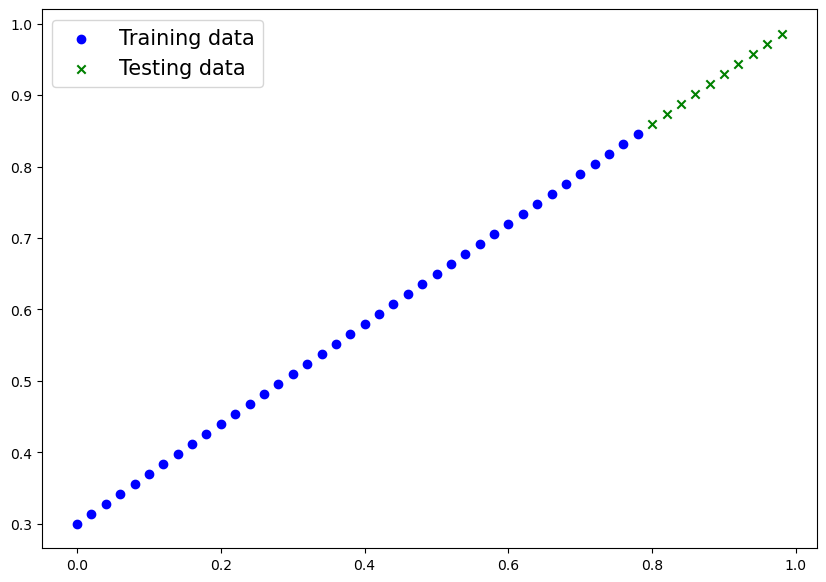

In [9]:
plot_predictions()

**Building our first PyTorch Model**

In [10]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # ,<- almost everything in PyTorch inheits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad= True, dtype = torch.float))
    
    
    def forward(self, x : torch.Tensor) -> torch.Tensor: # <- 'x' is the input data
        return self.weights * x + self.bias

- Checking the contensts of a PyTorch model

In [11]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [14]:
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")

print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


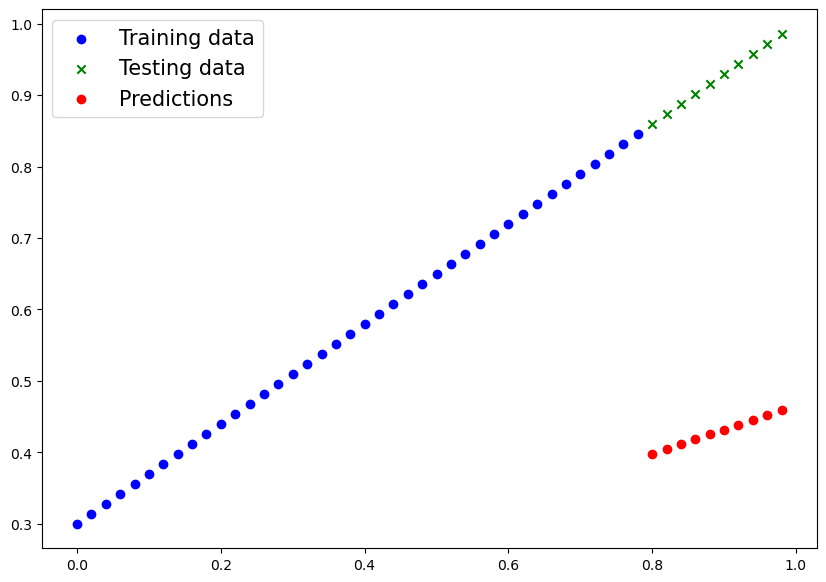

In [15]:
plot_predictions(predictions=y_preds)

In [16]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [18]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# setup a loos function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),lr = .01) # lr = learning rate alpha


In [ ]:

# Building a training loop (and a testing loop) in PyTorch
# A couple of things we need in a training loop:
# 1. Forward pass (this involves data moving through our model a )